# Economic Connectedness

### Virginia Kostara

This project is inspired by the following academic papers:

* Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital I: measurement and associations with economic mobility. Nature 608, 108–121 (2022). https://doi.org/10.1038/s41586-022-04996-4.

* Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital II: determinants of economic connectedness. Nature 608, 122–134 (2022). https://doi.org/10.1038/s41586-022-04997-3.

## Question 1

The purpose of the first question is to create an interactive US map that showcases the Economic Connectedness of each county (Figure 2a of the first paper).

Initially, we visit the [Social Capital Atlas Datasets](https://data.humdata.org/dataset/social-capital-atlas) page in order to find the appropriate data for our analysis. Based on the README file, we download the 'social_capital_county.csv' file as it contains information about economic connectedness in each US county.

In [284]:
from pathlib import Path #library in order to open files on both Windows and Mac/Linux

In [285]:
import pandas as pd

data_folder = Path("data/")

file_to_open = data_folder / 'social_capital_county.csv'

df = pd.read_csv(file_to_open)

In [286]:
df.head(100)

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4001,"Apache, Arizona",17653.7910,71522.0,0.48368,0.00928,0.49802,0.02673,0.42059,1.05762,...,0.48499,0.68494,0.10499,-0.21146,-0.02687,-0.15871,0.08587,0.97656,0.06021,0.01868
96,4003,"Cochise, Arizona",17019.1390,126279.0,0.79714,0.00898,0.75994,0.02136,0.78407,1.20589,...,0.77190,0.90426,0.04624,-0.18209,0.01550,-0.07067,0.09400,0.98288,0.08351,0.02236
97,4005,"Coconino, Arizona",15475.5010,140217.0,0.75237,0.00923,0.78612,0.02548,0.81461,1.34867,...,0.84153,0.98718,0.13738,-0.13633,0.06584,-0.16071,0.08829,0.97489,0.10576,0.02241
98,4007,"Gila, Arizona",6761.5410,53400.0,0.61997,0.01084,0.75176,0.03073,0.57771,1.08929,...,0.74951,0.77479,0.09276,-0.19653,-0.00300,-0.06779,0.11768,0.99426,0.08034,0.02561


We keep only the columns of the dataframe that are needed. To specify, these are the code, the name and the economic connectedness index of each county. By definition, economic connectedness is two times the share
of high-SES friends among low-SES individuals, averaged over all low-SES individuals in the county.

In [287]:
df = df[['county', 'ec_county', 'county_name']]

In [288]:
df.shape

(3089, 3)

In [289]:
df.head(800)

,county,ec_county,county_name
0,1001,0.72077,"Autauga, Alabama"
1,1003,0.74313,"Baldwin, Alabama"
2,1005,0.41366,"Barbour, Alabama"
3,1007,0.63152,"Bibb, Alabama"
4,1009,0.72562,"Blount, Alabama"
...,...,...,...
795,19023,1.15878,"Butler, Iowa"
796,19025,1.09704,"Calhoun, Iowa"
797,19027,1.10222,"Carroll, Iowa"
798,19029,0.91459,"Cass, Iowa"


As we can observe, there are both 4-digit and 5-digit integers as values in the first column. The reason behind this issue is that, when the first digit was 0, it was ignored. Hence, we fix this problem in order for all the integers to be in the range [00000,99999]

In [290]:
df['county']= df['county'].apply(lambda x: '{0:0>5}'.format(x))
df.head(800)

,county,ec_county,county_name
0,01001,0.72077,"Autauga, Alabama"
1,01003,0.74313,"Baldwin, Alabama"
2,01005,0.41366,"Barbour, Alabama"
3,01007,0.63152,"Bibb, Alabama"
4,01009,0.72562,"Blount, Alabama"
...,...,...,...
795,19023,1.15878,"Butler, Iowa"
796,19025,1.09704,"Calhoun, Iowa"
797,19027,1.10222,"Carroll, Iowa"
798,19029,0.91459,"Cass, Iowa"


In [291]:
df1 = df['ec_county'].isnull().sum()
df1

71

It is obvious that we do not know the economic connectedness index for 71 counties. Therefore, we should proceed with missing data handling. 

By default, the economic connectedness of a county can not be a negative number. So, we replace the null values with the integer -1. Thanks to this technique, it is easier to present those cases in the USA map that follows without violating any logical condition.

In [292]:
for i in range(len(df['ec_county'].isnull())):               #fixing null values
    if df['ec_county'].isnull()[i]==True:
        df['ec_county'][i] = -1

C:\Users\anact\AppData\Local\Temp\ipykernel_35776\1159587325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


When it comes to our map, we would like each county to be colored based on a specific color scale. To clarify, counties with high rates of EC should be colored in blue and with low rates of EC in red. Therefore, we classified the counties in 12 bins. Each bin is characterized by a particular color of this color palette (Red to Blue). In order to achieve this, we visit the [RdBu-11](https://loading.io/color/feature/RdBu-11/) page to find out the hex code of the colors that we are interested in. Before we create the "colorscale1" list, we have also found the hex code that corresponds to the gold color. This color would indicate all the counties that do not have an EC value. Afterwards, we just sort the list's values in order to be presented correctly in the map's legend. 

In [293]:
colorscale1 = ["#d4af37",  "#b2182b", "#d6604d", "#f4a582", "#fddbc7", "#f7f7f7",
    "#d1e5f0", "#92c5de", "#4393c3",
    "#2166ac", "#053061", "#08306b"
]

colorscale = colorscale1[::-1]
colorscale

['#08306b',
 '#053061',
 '#2166ac',
 '#4393c3',
 '#92c5de',
 '#d1e5f0',
 '#f7f7f7',
 '#fddbc7',
 '#f4a582',
 '#d6604d',
 '#b2182b',
 '#d4af37']

As we are going to plot the US map using plotly, we want to refer to each county based on its GeoLocation. In fact, plotly's method 'choropleth' does not have a parameter that matches county codes with the real position of each county on the globe's map. Thus, based on [Plotly's Documentation](https://plotly.com/python/mapbox-county-choropleth/), we can access data about the counties and their geographic coordinates on this [Github repository](https://github.com/plotly/datasets/blob/master/geojson-counties-fips.json). Given the fact that we do not own this repository (and we cannot be sure about its existence in the future), we have downloaded and saved the JSON file locally. So, we can be confident that this file will be given as input to the "geojson" parameter (choropleth method) and that each county will be presented at the map. However, that does not mean that all the counties will be colored appropriately according to their EC index. We must check that our initial dataframe has as many rows as the existing counties that can be found in the JSON file. In case a row about a specific county is missing, it will be created manually and we will consider this issue as a 'missing data case' (similar approach with the one that has been mentioned above).

In [294]:
import json

data_folder = Path("data/")

file_to_open = data_folder / 'geojson-counties-fips.json'

counties1 = open(file_to_open,)
counties = json.load(counties1)


import pprint

for cnt in counties['features']:                                  #fixing non existant counties
    if str(cnt['id']) not in df['county'].tolist() and str(cnt['id'][1:]) not in df['county'].tolist():
        df = df.append({'county':cnt['id'],'county_name':cnt['properties']['NAME'],'ec_county':-1},ignore_index=True)

C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2091892773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

We are ready to create the USA map. Initially, we import the appropriate libraries, plotly and numpy. The first one has to do with the creation of the map and the second one with the creation of 12 bins. It should be mentioned that each bin is used to group the counties whose Economic Connectedness belongs to a specific range (e.g. (0.84,0.93]). Each bin is linked with a color from the color palette (Red-blue scale). Quick reminder: we have already sorted the hex codes of the selected colors in order to follow the right color sequence. Therefore, we sort our 'df' dataframe based on the rows' values regarding the EC index with the aim of matching counties with the right color (high EC -> Blue color / low EC -> Red color). What is more, we want to make our US map more interactive. When the pointed hovers each county, it displays the name of the county and the state it belongs to, the code of the county, and the Economic Connectedness (round numbers) of the county. If there are no data for a particular county (missing data scenario), it is painted gold and it is assigned to the last bin. The bin is the last one as its associated color does not belong to RdBu sequence. In addition, in this case, the economic connectedness is be given as "NA". Lastly, as we were running the following code, we noticed that the plot could not be shown without Internet access. Hence, we added an extra implementation in order to open the plot in a html page.

<b>Note:</b> As the plot loading demands too much space, we have marked the following lines of code as comments. You can see the actual figure in the *figure 1* directory.

In [295]:
# import plotly.express as px
# import numpy as np


# df = df.sort_values("ec_county",ascending=False) # this line guarantees the correct color assignment (RdBu color scale)


# fig = px.choropleth(    df,
#                         geojson=counties, # Spatial coordinates
#                         locations='county',
#                         scope='usa',  # limit map scope to USA
#                         color=pd.cut(df["ec_county"], bins=np.arange(0.39, 1.40, 0.09)).astype(str), # Data to be color-coded
#                         color_discrete_sequence = colorscale,
#                         hover_name = 'county_name',
#                         hover_data = {'Economic Connectedness': df['ec_county'].round(decimals = 2).replace(-1,'NA')},
#                         labels={'color':'Economic Connectedness'}
#                     )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, legend=dict(     #legend adjustment
#     yanchor="middle",y=0.5,
#     xanchor="right",
#     x=1.2
    
# ))
# fig.show()


# # Import the necessaries libraries
# import plotly.offline as pyo

# # Set notebook mode to work in offline
# pyo.init_notebook_mode()

# #Open the plot in a html page
# pyo.plot(fig, filename = 'plot.html')

## Question 2

The purpose of the second question is to create a scatter plot of upward income mobility against economic connectedness (EC) for the 200 most populous US counties (Figure 4 of the first paper).

Initially, we visit the [Opportunity Insights](https://opportunityinsights.org/data/) page in order to find the appropriate data for our analysis. As we scroll down, we can find the 'The Opportunity Atlas: Mapping the Childhood Roots of Social Mobility' section. We are interested in data on a county level. Based on the title and the README file, we download the 'Household Income and Incarceration for Children from Low-Income Households by County, Race, and Gender' file as it contains information about income mobility in each US county.

When it comes to the Economic Connectedness Index, we follow the same steps above (first question).

In [296]:
data_folder = Path("data/")

file_to_open = data_folder / 'social_capital_county.csv'

df = pd.read_csv(file_to_open)
df.head(100)

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4001,"Apache, Arizona",17653.7910,71522.0,0.48368,0.00928,0.49802,0.02673,0.42059,1.05762,...,0.48499,0.68494,0.10499,-0.21146,-0.02687,-0.15871,0.08587,0.97656,0.06021,0.01868
96,4003,"Cochise, Arizona",17019.1390,126279.0,0.79714,0.00898,0.75994,0.02136,0.78407,1.20589,...,0.77190,0.90426,0.04624,-0.18209,0.01550,-0.07067,0.09400,0.98288,0.08351,0.02236
97,4005,"Coconino, Arizona",15475.5010,140217.0,0.75237,0.00923,0.78612,0.02548,0.81461,1.34867,...,0.84153,0.98718,0.13738,-0.13633,0.06584,-0.16071,0.08829,0.97489,0.10576,0.02241
98,4007,"Gila, Arizona",6761.5410,53400.0,0.61997,0.01084,0.75176,0.03073,0.57771,1.08929,...,0.74951,0.77479,0.09276,-0.19653,-0.00300,-0.06779,0.11768,0.99426,0.08034,0.02561


Although we repeat the same process by reading the social_capital_county.csv, at this time we are also interested in the column that contains information about the population of each county. In fact, we are going to visualize only the 200 most populous counties in our plot. So, we will sort our data based on each county's population (descending order) and then keep only the first 200 rows of our dataframe.

In [297]:
df = df[['county', 'ec_county', 'county_name', 'pop2018']]
df.head(10)

,county,ec_county,county_name,pop2018
0,1001,0.72077,"Autauga, Alabama",55200.0
1,1003,0.74313,"Baldwin, Alabama",208107.0
2,1005,0.41366,"Barbour, Alabama",25782.0
3,1007,0.63152,"Bibb, Alabama",22527.0
4,1009,0.72562,"Blount, Alabama",57645.0
5,1011,0.35515,"Bullock, Alabama",10352.0
6,1013,0.46026,"Butler, Alabama",20025.0
7,1015,0.60189,"Calhoun, Alabama",115098.0
8,1017,0.49761,"Chambers, Alabama",33826.0
9,1019,0.60461,"Cherokee, Alabama",25853.0


In [298]:
df = df.sort_values("pop2018",ascending=False)
df

,county,ec_county,county_name,pop2018
203,6037,0.73580,"Los Angeles, California",10098052.0
605,17031,0.75869,"Cook, Illinois",5223719.0
2598,48201,0.67668,"Harris, Texas",4602523.0
102,4013,0.74400,"Maricopa, Arizona",4253913.0
221,6073,0.90846,"San Diego, California",3302833.0
...,...,...,...,...
2748,49009,NaN,"Daggett, Utah",NaN
2759,49031,NaN,"Piute, Utah",NaN
2760,49033,1.15372,"Rich, Utah",NaN
2934,53069,0.92340,"Wahkiakum, Washington",NaN


In [299]:
df = df.head(200)
df

,county,ec_county,county_name,pop2018
203,6037,0.73580,"Los Angeles, California",10098052.0
605,17031,0.75869,"Cook, Illinois",5223719.0
2598,48201,0.67668,"Harris, Texas",4602523.0
102,4013,0.74400,"Maricopa, Arizona",4253913.0
221,6073,0.90846,"San Diego, California",3302833.0
...,...,...,...,...
2517,48039,0.83867,"Brazoria, Texas",353999.0
357,12083,0.62977,"Marion, Florida",348371.0
1310,27003,1.03045,"Anoka, Minnesota",347431.0
2512,48027,0.77036,"Bell, Texas",342236.0


We would like to check that all the records have a value at the ec_county column. If they had not, we could not plot the 200 points on our diagram.

In [300]:
df1 = df['ec_county'].isnull().sum()
df1

0

Now, it's time to read the 'Household Income and Incarceration for Children from Low-Income Households by County, Race, and Gender' file that is saved as 'county_outcomes_simple.csv'.

In [301]:
data_folder = Path("data/")

file_to_open = data_folder / 'county_outcomes_simple.csv'

income = pd.read_csv(file_to_open)
income.head(10)

,state,county,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,kfr_black_pooled_p25,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
0,1,1,11101.0,Montgomery,0.361666,0.005026,0.030568,0.004108,5922.3921,0.307032,...,0.057968,0.057395,0.025038,0.006608,1874.468100,989.14886,50.308254,1739.24780,989.096620,54.077316
1,1,3,11001.0,Mobile,0.388847,0.003599,0.022593,0.002463,15458.3960,0.301880,...,0.054038,0.034066,0.029861,0.004701,5544.375000,1964.96840,218.435900,5226.07810,1916.269400,210.060300
2,1,5,10301.0,Eufaula,0.349386,0.005937,0.033516,0.005712,4863.9736,0.308615,...,NaN,NaN,0.009500,0.006570,729.842530,1787.36910,NaN,629.64722,1806.091700,NaN
3,1,7,10801.0,Tuscaloosa,0.363391,0.008233,0.031667,0.007499,3061.4934,0.309438,...,NaN,NaN,0.038612,0.013741,983.285580,613.93317,NaN,941.44788,565.889710,NaN
4,1,9,10700.0,Birmingham,0.391879,0.005882,0.020528,0.003750,6740.9116,0.310179,...,0.037591,0.027402,0.034564,0.007016,2946.530000,71.30426,442.633730,2779.32890,64.377319,411.615330
5,1,11,9800.0,Auburn,0.345659,0.007953,0.019160,0.005891,2581.3296,0.327396,...,NaN,NaN,0.027017,0.032061,87.676537,1096.40530,NaN,121.27898,1200.085100,NaN
6,1,13,11101.0,Montgomery,0.357249,0.006073,0.022641,0.004163,4092.7781,0.310516,...,NaN,NaN,0.006235,0.002784,738.578430,1381.82420,NaN,659.42963,1315.358600,NaN
7,1,15,9600.0,LaGrange,0.361847,0.003164,0.026158,0.002393,15036.1470,0.315430,...,0.006057,0.007244,0.021575,0.003978,4676.885700,2553.98100,117.875070,4551.60840,2507.769300,159.456240
8,1,17,9600.0,LaGrange,0.340575,0.004887,0.021026,0.003670,5885.4712,0.317650,...,NaN,NaN,0.036681,0.011401,1129.088000,1806.63110,NaN,1047.68680,1821.011700,NaN
9,1,19,6600.0,Rome,0.365422,0.007608,0.022722,0.005292,3303.9607,0.306993,...,NaN,NaN,0.030627,0.008660,1538.091200,130.06798,NaN,1361.06050,121.614400,NaN


We keep only the columns of the dataframe that are needed. To specify, these are the two-digit state 2010 FIPS code, the three-digit county 2010 FIPS code, the commuting zone name and the mean household income rank for children whose 
parents were at the 25th percentile of the national income distribution. It is important to declare that the data about income rank are pooled based on race and gender. In this way, we will not jump to subjective conclusions and we will approach our scientific question more holistically.

In [302]:
income = income[['state', 'county', 'czname', 'kfr_pooled_pooled_p25']]
income

,state,county,czname,kfr_pooled_pooled_p25
0,1,1,Montgomery,0.361666
1,1,3,Mobile,0.388847
2,1,5,Eufaula,0.349386
3,1,7,Tuscaloosa,0.363391
4,1,9,Birmingham,0.391879
...,...,...,...,...
3214,72,145,NaN,0.252577
3215,72,147,NaN,NaN
3216,72,149,NaN,0.212865
3217,72,151,NaN,0.256017


We want to create a scatter plot. The information needed concerning the x axis is stored in the 'df' dataframe and the information concerning the y axis in the 'income' dataframe. We would like to merge these 2 dataframes in order to plot our diagram. The inner join of the 2 dataframes should be based on the unique code of each county. However, we can observe that we face a similar problem with the one we saw on the first question. In the 'df' dataframe, there are both 4-digit and 5-digit integers as values in the first column 'county'. The reason behind this issue is that, when the first digit was 0, it was ignored. In addition, in the 'income' dataframe, the 5-digit county code does not exist and it should be created by combining the 2-digit state code and the 3-digit county code of each row. In case the state code consists of one digit or/and the county code consists of one or two digits, we should manually add the appropriate number of zeros in the beginning of each sub-code.

At the end, we fix this problem in order for all the integers to be in the range [00000,99999] 

In [303]:
income['state']= income['state'].apply(lambda x: '{0:0>2}'.format(x))
income['county']= income['county'].apply(lambda x: '{0:0>3}'.format(x))
income.head(100)

,state,county,czname,kfr_pooled_pooled_p25
0,01,001,Montgomery,0.361666
1,01,003,Mobile,0.388847
2,01,005,Eufaula,0.349386
3,01,007,Tuscaloosa,0.363391
4,01,009,Birmingham,0.391879
...,...,...,...,...
95,02,290,Fairbanks,0.278794
96,04,001,Gallup,0.339157
97,04,003,Tucson,0.412434
98,04,005,Flagstaff,0.404033


In [304]:
df['county']= df['county'].apply(lambda x: '{0:0>5}'.format(x))
df.head(5)

C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2544141439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,county,ec_county,county_name,pop2018
203,06037,0.73580,"Los Angeles, California",10098052.0
605,17031,0.75869,"Cook, Illinois",5223719.0
2598,48201,0.67668,"Harris, Texas",4602523.0
102,04013,0.74400,"Maricopa, Arizona",4253913.0
221,06073,0.90846,"San Diego, California",3302833.0


In [305]:
income['state'] = income['state'].apply(str)
income['county'] = income['county'].apply(str)
income.dtypes

state                     object
county                    object
czname                    object
kfr_pooled_pooled_p25    float64
dtype: object

In [306]:
income['county'] = income['state'].str.cat(income['county']) 
income

,state,county,czname,kfr_pooled_pooled_p25
0,01,01001,Montgomery,0.361666
1,01,01003,Mobile,0.388847
2,01,01005,Eufaula,0.349386
3,01,01007,Tuscaloosa,0.363391
4,01,01009,Birmingham,0.391879
...,...,...,...,...
3214,72,72145,NaN,0.252577
3215,72,72147,NaN,NaN
3216,72,72149,NaN,0.212865
3217,72,72151,NaN,0.256017


In [307]:
income = income[['county', 'czname', 'kfr_pooled_pooled_p25']]
income

,county,czname,kfr_pooled_pooled_p25
0,01001,Montgomery,0.361666
1,01003,Mobile,0.388847
2,01005,Eufaula,0.349386
3,01007,Tuscaloosa,0.363391
4,01009,Birmingham,0.391879
...,...,...,...
3214,72145,NaN,0.252577
3215,72147,NaN,NaN
3216,72149,NaN,0.212865
3217,72151,NaN,0.256017


In [308]:
q2 = pd.merge(df,income)
q2

,county,ec_county,county_name,pop2018,czname,kfr_pooled_pooled_p25
0,06037,0.73580,"Los Angeles, California",10098052.0,Los Angeles,0.431230
1,17031,0.75869,"Cook, Illinois",5223719.0,Chicago,0.384614
2,48201,0.67668,"Harris, Texas",4602523.0,Houston,0.418473
3,04013,0.74400,"Maricopa, Arizona",4253913.0,Phoenix,0.398581
4,06073,0.90846,"San Diego, California",3302833.0,San Diego,0.425785
...,...,...,...,...,...,...
195,48039,0.83867,"Brazoria, Texas",353999.0,Pearland,0.451939
196,12083,0.62977,"Marion, Florida",348371.0,Ocala,0.374836
197,27003,1.03045,"Anoka, Minnesota",347431.0,Minneapolis,0.457203
198,48027,0.77036,"Bell, Texas",342236.0,Killeen,0.381505


We want to create a sub-dataframe in order to store all the information we have about the 5 counties that will stand out in our plot. In this way, it would be easier for us to access just the 5 rows that we are interested in, to make the appropriate changes (e.g. manually change the county name of NY so as to be correctly displayed) and to quickly identify their values regarding the EC and income rank metrics.

In [309]:
sel_countynames = ['New York, New York', 'Hennepin, Minnesota', 'Marion, Indiana', 'San Francisco, California', 'Salt Lake, Utah']

subq2= q2[q2['county_name'].isin(sel_countynames)]
subq2

,county,ec_county,county_name,pop2018,czname,kfr_pooled_pooled_p25
20,36061,0.82734,"New York, New York",1632480.0,New York,0.418693
33,27053,0.97632,"Hennepin, Minnesota",1235478.0,Minneapolis,0.428964
38,49035,0.96395,"Salt Lake, Utah",1120805.0,Salt Lake City,0.454131
50,18097,0.64282,"Marion, Indiana",944523.0,Indianapolis,0.344080
62,06075,1.31244,"San Francisco, California",870044.0,San Francisco,0.503888


In [310]:
subq2['czname'] = subq2['czname'].replace(['New York'], 'New York City')
subq2

C:\Users\anact\AppData\Local\Temp\ipykernel_35776\2043172511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,county,ec_county,county_name,pop2018,czname,kfr_pooled_pooled_p25
20,36061,0.82734,"New York, New York",1632480.0,New York City,0.418693
33,27053,0.97632,"Hennepin, Minnesota",1235478.0,Minneapolis,0.428964
38,49035,0.96395,"Salt Lake, Utah",1120805.0,Salt Lake City,0.454131
50,18097,0.64282,"Marion, Indiana",944523.0,Indianapolis,0.344080
62,06075,1.31244,"San Francisco, California",870044.0,San Francisco,0.503888


In [311]:
sub = subq2.reset_index()
sub

,index,county,ec_county,county_name,pop2018,czname,kfr_pooled_pooled_p25
0,20,36061,0.82734,"New York, New York",1632480.0,New York City,0.418693
1,33,27053,0.97632,"Hennepin, Minnesota",1235478.0,Minneapolis,0.428964
2,38,49035,0.96395,"Salt Lake, Utah",1120805.0,Salt Lake City,0.454131
3,50,18097,0.64282,"Marion, Indiana",944523.0,Indianapolis,0.344080
4,62,06075,1.31244,"San Francisco, California",870044.0,San Francisco,0.503888


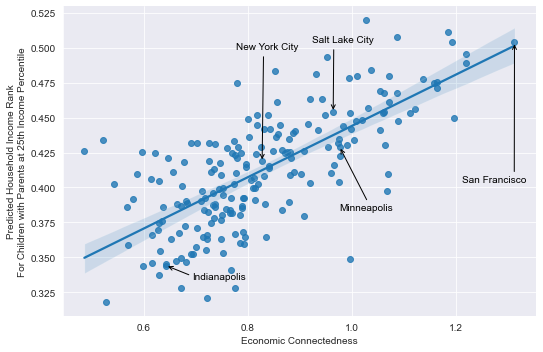

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting the diagram
sns.set_style('darkgrid')
plot = sns.lmplot(x='ec_county', y='kfr_pooled_pooled_p25', data=q2, aspect=1.5)
#changing the axis labels
plot.set(xlabel='Economic Connectedness', ylabel='Predicted Household Income Rank\nFor Children with Parents at 25th Income Percentile')


# for the 5 selected counties, we print their name in the position that is specified manually by us 
plt.text(sub['ec_county'][0]-0.05, sub["kfr_pooled_pooled_p25"][0]+0.08, sub['czname'][0] ,horizontalalignment='left', size='medium', color='black')
plt.text(sub['ec_county'][1], sub["kfr_pooled_pooled_p25"][1]-0.045, sub['czname'][1] ,horizontalalignment='left', size='medium', color='black')
plt.text(sub['ec_county'][2]-0.04, sub["kfr_pooled_pooled_p25"][2]+0.05, sub['czname'][2] ,horizontalalignment='left', size='medium', color='black')
plt.text(sub['ec_county'][3]+0.05, sub["kfr_pooled_pooled_p25"][3]-0.01, sub['czname'][3] ,horizontalalignment='left', size='medium', color='black')
plt.text(sub['ec_county'][4]-0.1, sub["kfr_pooled_pooled_p25"][4]-0.1, sub['czname'][4] ,horizontalalignment='left', size='medium', color='black')

# for the 5 selected counties, we print their corresponding arrows
# The start-point of the arrows is defined by the 'xytext' coordinates
# and the end-point by the 'xy' coordinates
plt.annotate('', xy=(0.82734,0.418693), xytext=(0.83,0.495),
            arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate('', xy=(0.97632,0.428964), xytext=(1.03,0.39),
            arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate('', xy=(0.96395,0.454131), xytext=(0.965,0.5),
            arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate('', xy=(0.64282,0.344080), xytext=(0.69,0.337),
            arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate('', xy=(1.31244,0.503888), xytext=(1.312,0.41),
            arrowprops=dict(arrowstyle='->', color='black'))

plt.show()

# Question 3

The purpose of the third question is to create a scatter plot of economic connectedness (EC) against median household income in zip code (Figure 6 of the first paper).

Initially, we visit the [Opportunity Insights](https://opportunityinsights.org/data/) page in order to find the appropriate data for our analysis. At the top of the webpage, we can find the 'Social Capital II: Determinants of Economic Connectedness' section. We download the zip package named 'Replication Code and Data' and we unzip it. Based on the README file, we decide to pay attention to 'zip_covariates.dta' file as it contains information about zip code-level data regarding several income metrics. Furthermore, we are interested in the economic connectedness not on a county-basis (as before), but on a zip-basis. Hence, we visit the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) site and we download the 'Social Capital Atlas - US Zip Codes.csv' file. Given on the corresponding documentation, we understand that the data of this file refer to EC index (as we wanted so). 
 

In [313]:
data_folder = Path("data/social_capital_replication/Other public covariate data/")

file_to_open = data_folder / 'zip_covariates.dta'

In [314]:
q3_df1 = pd.read_stata(file_to_open)
q3_df1

,zip,num_below_p50,kfr_pooled_pooled_p25,kfr_26_pooled_pooled_p25,kid_black_pooled_blw_p50_n,kfr_black_pooled_p25,kid_white_pooled_blw_p50_n,kfr_white_pooled_p25,pop_2000_n,jobs_total_5mi_2015,...,pop2018,med_inc_2018,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,cz,czname
0,36006,210.877877,0.375984,0.460341,81.351499,0.348443,120.394809,0.412860,1207.138634,309.533479,...,913,47148.0,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953,11101.0,Montgomery
1,36067,3396.898229,0.351230,0.413896,1187.164279,0.295008,2022.323759,0.402333,23045.006217,6666.228625,...,28727,53578.0,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155,11101.0,Montgomery
2,36749,193.980705,0.356113,0.418601,114.752491,0.332565,73.111485,0.409344,1069.127396,1177.834674,...,779,37054.0,0.707317,0.292683,0.000000,0.000000,0.000000,0.000000,11101.0,Montgomery
3,36066,1261.963181,0.404268,0.445521,250.701201,0.327684,933.891151,0.438869,13441.530151,11873.922321,...,19097,62089.0,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165,11101.0,Montgomery
4,36051,278.664883,0.360447,0.423355,61.973826,0.331816,199.838793,0.388097,1866.933563,592.243591,...,2106,69423.0,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670,11101.0,Montgomery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32812,82442,84.668144,0.492363,0.504219,NaN,NaN,64.030983,0.520918,673.726135,NaN,...,710,55733.0,0.969014,0.000000,0.000000,0.000000,0.000000,0.004225,34302.0,Worland
32813,82401,827.899271,0.460857,0.500579,NaN,NaN,597.772352,0.484634,7679.737826,NaN,...,7585,52988.0,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615,34302.0,Worland
32814,82730,127.302503,0.499194,0.511907,NaN,NaN,118.333812,0.507033,1406.432987,NaN,...,1531,41667.0,0.852384,0.022208,0.000000,0.019595,0.000000,0.035924,34601.0,Gillette
32815,82701,492.476140,0.482879,0.526536,NaN,NaN,443.024637,0.490022,5065.365210,515.000000,...,5486,55192.0,0.921619,0.000365,0.006744,0.051039,0.000000,0.013489,34601.0,Gillette


We keep only the columns of the dataframe that are needed. To specify, these are the 5-digit ZIP code tabulation area code, the mean income percentile in adulthood of a child born to parents at the 25th percentile of the income distribution and the median household income in 2018. It is important to declare that the data about mean income percentile are pooled based on race and gender. In this way, we will not jump to subjective conclusions and we will approach our scientific question more holistically.

In [315]:
q3_df1 = q3_df1[['zip','kfr_pooled_pooled_p25','med_inc_2018']]
q3_df1

,zip,kfr_pooled_pooled_p25,med_inc_2018
0,36006,0.375984,47148.0
1,36067,0.351230,53578.0
2,36749,0.356113,37054.0
3,36066,0.404268,62089.0
4,36051,0.360447,69423.0
...,...,...,...
32812,82442,0.492363,55733.0
32813,82401,0.460857,52988.0
32814,82730,0.499194,41667.0
32815,82701,0.482879,55192.0


In [316]:
data_folder = Path("data/")

file_to_open = data_folder / 'social_capital_zip.csv'

q3_df2 = pd.read_csv(file_to_open)
q3_df2

,zip,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.105720,0.945260,0.05650,0.010800
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.103400,0.901630,0.14951,0.036880
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.136500,0.769240,0.10501,0.080500
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.105540,0.958370,0.15862,0.021630
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.103910,0.948730,0.13053,0.016900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23023,99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,...,1.09039,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.134730,0.997200,0.11883,0.029990
23024,99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,...,1.04318,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.155610,0.997520,0.08404,0.032150
23025,99925,2198.0,154.513840,927,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.146579,0.992298,0.12396,0.027728
23026,99926,2198.0,311.014252,1635,0.87888,0.03618,0.81081,0.83409,1.07167,0.04187,...,0.92952,0.80694,0.00877,-0.07257,-0.00480,-0.09655,0.252740,1.000000,0.14291,0.011250


We keep only the columns of the dataframe that are needed (as usual). To specify, these are the 5-digit ZIP code tabulation area code and the EC index and the population (2018) referring to each zip code. By definition, economic connectedness is two times the share of high-SES friends among low-SES individuals, averaged over all low-SES individuals in the ZIP code.

In [317]:
q3_df2 = q3_df2[['zip', "ec_zip", "pop2018"]]
q3_df2

,zip,ec_zip,pop2018
0,1001,0.88157,17621
1,1002,1.18348,30066
2,1003,1.37536,11238
3,1005,1.15543,4991
4,1007,1.19240,14967
...,...,...,...
23023,99901,0.99517,13818
23024,99921,0.87977,1986
23025,99925,NaN,927
23026,99926,0.87888,1635


At the third question, we face no problem regarding the merge of the 2 dataframes. We execute an inner join based on the shared column 'zip'.

In [318]:
q3_merged = pd.merge(q3_df1,q3_df2)
q3_merged

,zip,kfr_pooled_pooled_p25,med_inc_2018,ec_zip,pop2018
0,36006,0.375984,47148.0,NaN,913
1,36067,0.351230,53578.0,0.69065,28727
2,36066,0.404268,62089.0,0.77508,19097
3,36051,0.360447,69423.0,0.68328,2106
4,36003,0.339764,27841.0,NaN,1898
...,...,...,...,...,...
23014,82937,0.583217,79149.0,1.04296,4375
23015,82944,0.562790,NaN,1.08018,118
23016,82401,0.460857,52988.0,0.89415,7585
23017,82730,0.499194,41667.0,NaN,1531


We should clean our data from useless null values.

In [319]:
q3_merged.isnull().sum()

zip                         0
kfr_pooled_pooled_p25      17
med_inc_2018              136
ec_zip                   4041
pop2018                     0
dtype: int64

In [320]:
q3_merged = q3_merged.dropna()
q3_merged

,zip,kfr_pooled_pooled_p25,med_inc_2018,ec_zip,pop2018
1,36067,0.351230,53578.0,0.69065,28727
2,36066,0.404268,62089.0,0.77508,19097
3,36051,0.360447,69423.0,0.68328,2106
5,36530,0.400974,47321.0,0.68836,6939
6,36551,0.377224,54976.0,0.73779,9029
...,...,...,...,...,...
23011,83014,0.586060,119188.0,1.32670,3351
23013,82930,0.480981,55006.0,0.94396,14183
23014,82937,0.583217,79149.0,1.04296,4375
23016,82401,0.460857,52988.0,0.89415,7585


If we observe carefully the given figure that we should replicate, we can notice that there are no points/bullets whose median household income index is less than 30000 or greater than 100000. Therefore, we get rid of the rows that do not meet that condition and we consider these rows as outliers. 

In [321]:
q3_merged = q3_merged[(q3_merged.med_inc_2018 >= 30000) & (q3_merged.med_inc_2018 <= 100000)]
q3_merged

,zip,kfr_pooled_pooled_p25,med_inc_2018,ec_zip,pop2018
1,36067,0.351230,53578.0,0.69065,28727
2,36066,0.404268,62089.0,0.77508,19097
3,36051,0.360447,69423.0,0.68328,2106
5,36530,0.400974,47321.0,0.68836,6939
6,36551,0.377224,54976.0,0.73779,9029
...,...,...,...,...,...
23010,83001,0.538953,83657.0,1.04043,17145
23013,82930,0.480981,55006.0,0.94396,14183
23014,82937,0.583217,79149.0,1.04296,4375
23016,82401,0.460857,52988.0,0.89415,7585


We will create a new column named 'color' in the 'q3_merged' dataframe. The reason behind this decision is to simplify the process of coloring the records/points regarding the plotting of the figure. In this way, we pre-define the color that corresponds to each record by comparing its value on the 'kfr_pooled_pooled_p25' column with the 5 thresholds/bins (that were fixed and given). In order to do so, we will get advantage of the assets of the python dictionaries. In other words, after examining each row, we will store a specific key of the 'cl' dictionary. That key's paired value would be the decided color that describes the exact row. At the end, when all rows will have been examined, we will assign to the 'color' column the values that are paired with the stored keys. 

In [322]:
import numpy as np

bins = [0.385,0.415,0.445,0.485,1] #  legend
cl = {0:'#cd0000', 1:'#FFA500', 2:'#F2D2BD', 3:'#009acd', 4:'#191970'} # discrete color scale


cols = {}
q3_merged['color'] = np.nan # first create the column 'color' with NaN values


for i in q3_merged.index:    
    for j in range(len(bins)):
        if q3_merged['kfr_pooled_pooled_p25'][i]<bins[j]:
            cols[i]=cl[j]
            break

cols
q3_merged = q3_merged.assign(color=cols.values())
q3_merged

C:\Users\anact\AppData\Local\Temp\ipykernel_35776\3645943361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,zip,kfr_pooled_pooled_p25,med_inc_2018,ec_zip,pop2018,color
1,36067,0.351230,53578.0,0.69065,28727,#cd0000
2,36066,0.404268,62089.0,0.77508,19097,#FFA500
3,36051,0.360447,69423.0,0.68328,2106,#cd0000
5,36530,0.400974,47321.0,0.68836,6939,#FFA500
6,36551,0.377224,54976.0,0.73779,9029,#cd0000
...,...,...,...,...,...,...
23010,83001,0.538953,83657.0,1.04043,17145,#191970
23013,82930,0.480981,55006.0,0.94396,14183,#009acd
23014,82937,0.583217,79149.0,1.04296,4375,#191970
23016,82401,0.460857,52988.0,0.89415,7585,#009acd


In [323]:
# !pip install plotnine

We are ready to plot our figure. Nevertheless, we should pay attention to a final detail. When we are going to print our diagram, we will see that either the colors of the points/bullets or the legend are not correct (depending on the implementation). That is linked to the fact that we manually pre-defined the color of each row of our dataframe. Therefore, inspired by a 'stack overflow' question, we will proceed as following: First, we identify that the first row of our dataframe has as a value the color red (#cd0000). That means the scatter plot we can create at the moment will be, generally speaking, correct. However, it will have for sure the color red on its legend but nothing more. So, we create 4 empty scatter plots and each of them will have as a color one of the remaining ones. In practice, nothing unneccessary will be printed but the 4 needed colors will be added to the one and only legend. 

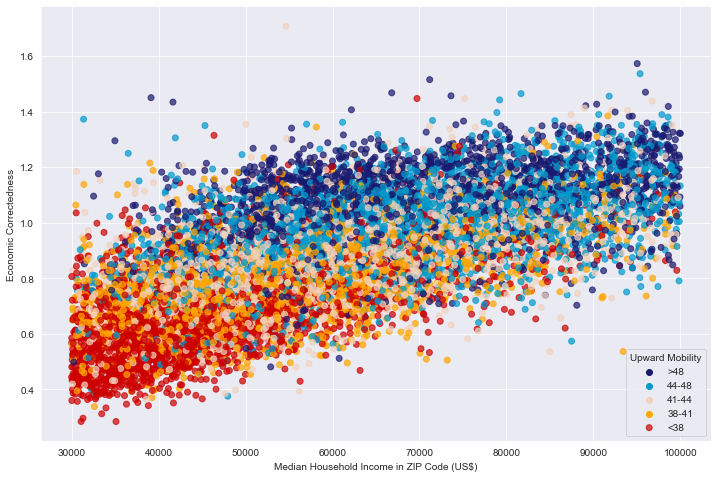

In [324]:
from plotnine import *
import matplotlib.pyplot as plt

f= plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

# plot scatter with colors
plt.scatter([],[],color=cl[4]) #https://stackoverflow.com/questions/29712994/wrong-scatter-label-color-in-pyplot-legend
plt.scatter([],[],color=cl[3])
plt.scatter([],[],color=cl[2])
plt.scatter([],[],color=cl[1])
sc = plt.scatter(q3_merged.med_inc_2018,q3_merged.ec_zip,c=q3_merged.color,marker='o',alpha=0.7,) #plot




# customize labels and legend
plt.xlabel('Median Household Income in ZIP Code (US$)')
plt.ylabel('Economic Correctedness')
plt.legend(['>48','44-48','41-44','38-41','<38'],
           title="Upward Mobility",loc='lower right')



# show plotting
plt.show()

## Question 4

The purpose of the fourth question is to depict the Socioeconomic Status (SES) of parents against the friending bias of students of low SES (Figure 5a of the second paper).

Initially, we visit the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) page in order to find the appropriate data for our analysis. As we are interested in data about students, we download the 'Social Capital Atlas - US High Schools.csv' file. Given on the corresponding documentation, we understand that the data of this file suit us for the purpose of this question.

In [325]:
data_folder = Path("data/")

file_to_open = data_folder / 'social_capital_high_school.csv'

df = pd.read_csv(file_to_open)
df.head(100)

,high_school,high_school_name,zip,county,students_9_to_12,ec_own_ses_hs,ec_own_ses_se_hs,ec_parent_ses_hs,ec_parent_ses_se_hs,ec_high_own_ses_hs,...,ec_high_parent_ses_hs,ec_high_parent_ses_se_hs,exposure_own_ses_hs,exposure_parent_ses_hs,bias_own_ses_hs,bias_parent_ses_hs,bias_high_own_ses_hs,bias_high_parent_ses_hs,clustering_hs,volunteering_rate_hs
0,00000044,Holy Spirit Catholic School,35405,1125,158,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693142,0.086807
1,00000226,John Carroll Catholic HS,35209,1073,538,1.52901,0.04220,1.43847,0.05073,1.64439,...,1.46086,0.04742,1.50707,1.44259,-0.01456,0.00285,-0.09112,-0.01266,0.604580,0.069540
2,00000237,Holy Family Cristo Rey Catholic HS,35218,1073,229,0.66359,0.07105,NaN,NaN,0.87627,...,NaN,NaN,0.65517,NaN,-0.01286,NaN,-0.33747,NaN,0.686860,0.051010
3,00000714,Montgomery Catholic Preparatory School,36116,1101,363,1.56551,0.05799,NaN,NaN,1.60898,...,NaN,NaN,1.49000,NaN,-0.05068,NaN,-0.07985,NaN,0.673730,0.042280
4,00000758,St Paul's Episcopal School,36608,1097,409,1.62628,0.04533,1.57592,0.05254,1.72722,...,1.60072,0.04730,1.62275,1.57514,-0.00217,-0.00050,-0.06438,-0.01624,0.623290,0.060610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,00073148,Junipero Serra HS,94403,6081,833,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.517797,0.034257
96,00073374,Marin Catholic HS,94904,6041,718,NaN,NaN,1.53072,0.05677,NaN,...,1.57781,0.04817,NaN,1.54838,NaN,0.01141,NaN,-0.01901,0.597550,0.049960
97,00073498,Mercy HS,94010,6081,362,1.87833,0.03052,1.32379,0.06861,1.87368,...,1.45977,0.05598,1.84263,1.39093,-0.01938,0.04827,-0.01685,-0.04949,0.560490,0.055670
98,00073942,San Joaquin Memorial HS,93703,6019,567,1.59646,0.04493,NaN,NaN,1.72578,...,NaN,NaN,1.59000,NaN,-0.00406,NaN,-0.08539,NaN,0.575470,0.050620


We keep only the columns of the dataframe that are needed. To specify, these are the 12-digit NCES school ID, the name of the high school, the Economic connectedness with parental SES (two times the share of high-parental-SES friends among low-parental-SES individuals, averaged over all low-parental-SES individuals at the school) and the friending bias among low-parental-SES students.

In [326]:
df = df[['high_school', 'high_school_name', 'ec_parent_ses_hs','bias_parent_ses_hs']]
df

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN
1,00000226,John Carroll Catholic HS,1.43847,0.00285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN
4,00000758,St Paul's Episcopal School,1.57592,-0.00050
...,...,...,...,...
17520,Y2121679,St Agnes Academy-St Dominic School,NaN,NaN
17521,Z0516931,Sayre School,NaN,NaN
17522,Z1326859,Fort Worth Christian School,NaN,NaN
17523,Z1326892,Second Baptist School,NaN,NaN


Based on the instructions of this assignment, we need to take the economic connectedness with parental SES and divide it by two.

In [327]:
df['ec_parent_ses_hs'] = df['ec_parent_ses_hs'].div(2)
df

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN
1,00000226,John Carroll Catholic HS,0.719235,0.00285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN
4,00000758,St Paul's Episcopal School,0.787960,-0.00050
...,...,...,...,...
17520,Y2121679,St Agnes Academy-St Dominic School,NaN,NaN
17521,Z0516931,Sayre School,NaN,NaN
17522,Z1326859,Fort Worth Christian School,NaN,NaN
17523,Z1326892,Second Baptist School,NaN,NaN


What is more, we know that both $x$ and $y$ axis of our figure should be percentages.

In [328]:
df['ec_parent_ses_hs'] = df['ec_parent_ses_hs'] * 100
df['bias_parent_ses_hs'] = df['bias_parent_ses_hs'] * 100

We create 4 new columns. They would really useful regarding the special treatment that is required for 15 selected high schools. 

In [329]:
df['ec_new']=np.NAN
df['bias_new']=np.NAN
df['ec_new2']=np.NAN
df['bias_new2']=np.NAN
df

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs,ec_new,bias_new,ec_new2,bias_new2
0,00000044,Holy Spirit Catholic School,NaN,NaN,NaN,NaN,NaN,NaN
1,00000226,John Carroll Catholic HS,71.9235,0.285,NaN,NaN,NaN,NaN
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN,NaN,NaN,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN,NaN,NaN,NaN,NaN
4,00000758,St Paul's Episcopal School,78.7960,-0.050,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
17520,Y2121679,St Agnes Academy-St Dominic School,NaN,NaN,NaN,NaN,NaN,NaN
17521,Z0516931,Sayre School,NaN,NaN,NaN,NaN,NaN,NaN
17522,Z1326859,Fort Worth Christian School,NaN,NaN,NaN,NaN,NaN,NaN
17523,Z1326892,Second Baptist School,NaN,NaN,NaN,NaN,NaN,NaN


We should make the appropriate minor changes in order to accomplish a good replication of the given figure.

In [330]:
df['high_school_name'] = df['high_school_name'].replace(['Payton College Preparatory HS'], 'Walter Payton College Prep')
df['high_school_name'] = df['high_school_name'].replace(['Evanston Twp HS'], 'Evanston Township HS')
df['high_school_name'] = df['high_school_name'].replace(['Cambridge Rindge And Latin'], 'Cambridge Rindge And Latin School')
df['high_school_name'] = df['high_school_name'].replace(['North Hollywood Sr HS'], 'North Hollywood HS')
df['high_school_name'] = df['high_school_name'].replace(['John L Leflore Magnet School'], 'Leflore Magnet HS')

It is time to deal with the 15 selected high schools. When it comes to our figure, we would like to print the labels of their names accompanied with arrows pointing at the coordinates that describe these specific schools. We could achieve that by installing and using adjustText. However, by doing that, we could not avoid overlapping labels on our plot. Therefore, we decided to do that manually. We arbitrarily divide the 15 high schools into 3 categories (based on the spatial coordinates) and we will get advantage of the new columns that we have created. In other words, the 'ec_new' and 'bias_new' columns will have the same values such as the 'ec_parent_ses_hs' and 'bias_parent_ses_hs' columns for these 15 schools. On the other hand, the 'ec_new2' and 'bias_new2' columns will define the coordinates of the labels. It is important to state that the 4 columns consist of NaN values apart from the 15 specific cases.

In [331]:
alist = ['00941729','060474000432','170993000942','170993001185','170993003989','171449001804','250327000436',
        '360009101928','370297001285','483702004138','250843001336','062271003230','010237000962','00846981','00852124']


for i in range(len(alist)):               
    a=df[df['high_school'] == alist[i]].index.values
    df['ec_new'][a[0]] = df['ec_parent_ses_hs'][a[0]]
    df['bias_new'][a[0]] = df['bias_parent_ses_hs'][a[0]]
    if df['bias_new'][a[0]] > 5: 
        df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] +5
        df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] - 5
        if df['high_school_name'][a[0]] == 'Berkeley HS':
            df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] -5
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] - 4 
        if df['high_school_name'][a[0]] == 'Cambridge Rindge And Latin School':
            df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] +18
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] +4
        if df['high_school_name'][a[0]] == 'Evanston Township HS':
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] +6
            df['ec_new2'][a[0]] = df['ec_new2'][a[0]] +1
    elif df['ec_new'][a[0]] > 50:
        df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] +10
        if df['high_school_name'][a[0]] == 'Walter Payton College Prep':
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] +6
            df['ec_new2'][a[0]] = df['ec_new2'][a[0]] +2
        if df['high_school_name'][a[0]] == 'Bishop Gorman HS':
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] +3
        if df['high_school_name'][a[0]] == 'Dalton School':
            df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] -4
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] -7
        if df['high_school_name'][a[0]] == 'Phillips Exeter Academy':
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] -5
    else:
        df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] -5
        df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] -3
        if df['high_school_name'][a[0]] == 'Lane Technical HS':
            df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] +9
        if df['high_school_name'][a[0]] == 'Brooklyn Technical HS':
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] -6
        if df['high_school_name'][a[0]] == 'West Charlotte HS':
            df['ec_new2'][a[0]] = df['ec_parent_ses_hs'][a[0]] -7
        if df['high_school_name'][a[0]] == 'Leflore Magnet HS':
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] -6
        if df['high_school_name'][a[0]] == 'New Bedford HS':
            df['bias_new2'][a[0]] = df['bias_parent_ses_hs'][a[0]] +5


C:\Users\anact\AppData\Local\Temp\ipykernel_35776\527929066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\527929066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\527929066.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\anact\AppData\Local\Temp\ipykernel_35776\527929066.py:29: SettingWithCopyWarning: 
A value is tryin

In [332]:
# !pip install plotnine

We move on to the figure plotting. To clarify, we have all the information needed stored at one dataframe. That would be a great asset for us as it would simplify the process of plotting (just 4 geom commands). The first geom command has to do with the plotting of our main diagram. We also add some lines about the ignorance of NaN values, the addition of axis labels, the reverse of the $y$ axis scale and the fix of the figure size. The second geom command has to do with the coloring of the 15 points that refer to the selected schools. The 'ec_new' and 'bias_new' columns are given as input. In this case, we take advantage of the argument 'na_rm' and we ignore the NaN values of these 2 columns. The third geom command has to do with the label printing for the selected 15 schools (again we ignore null values). The forth one has to do with the drawing of line segments defined by (x,y) and (xend,yend) coordinates. These line segments are the arrows that we want to print for the 15 specified high schools. The start-point of the lines is a label and the end-point is a point that describes one of the 15 schools.

C:\Users\anact\anaconda3\lib\site-packages\plotnine\scales\scales.py:36: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

C:\Users\anact\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_segment : Removed 17510 rows containing missing values.


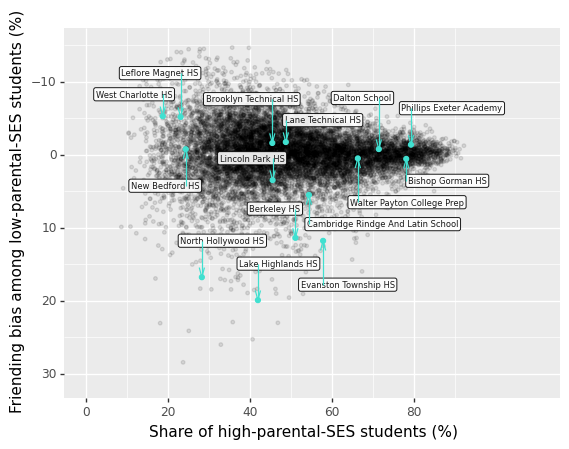

<ggplot: (146526258863)>

In [333]:
from plotnine import *
import matplotlib.pyplot as plt




ggplot(data=df) + \
  geom_point(mapping=aes(x='ec_parent_ses_hs', y='bias_parent_ses_hs'),
             na_rm=True, size=1, alpha=0.1) +scale_y_reverse()  +xlab('Share of high-parental-SES students (%)') +\
ylab('Friending bias among low-parental-SES students (%)')  + ylim(31,-15)+\
scale_x_continuous(limits = (0,110), breaks=[0,20,40,60,80]) +\
geom_point(mapping=aes(x='ec_new', y='bias_new'), 
             color='#40e0d0',na_rm=True, size=1.5, alpha=1) +\
geom_label(mapping=aes(x='ec_new2', y='bias_new2',label='high_school_name'),na_rm=True,alpha = 0.9,size=6) +\
geom_segment(mapping=aes(x='ec_new',xend= 'ec_new',y='bias_new2',yend='bias_new'), color="#40e0d0",arrow=arrow(angle=15,length=0.1))

## Question 5

The purpose of the fifth question is to depict friending bias against racial diversity based on college and neighborhood data (Extended Data Figure 3 of the second paper).

The fifth question has some similarities with the third one. Initially, we visit the [Opportunity Insights](https://opportunityinsights.org/data/) page in order to find the appropriate data for our analysis. At the top of the webpage, we can find the 'Social Capital II: Determinants of Economic Connectedness' section. We download the zip package named 'Replication Code and Data' and we unzip it. Based on the README file, we decide to pay attention to 'zip_covariates.dta' and 'college_characteristics.dta' files as they contain information about zip code-level (neighborhood) and college data regarding racial diversity. Furthermore, we are interested in the friending bias on a zip and college basis. Hence, we visit the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) site and we download the 'Social Capital Atlas - US Zip Codes.csv' and 'Social Capital Atlas - US Colleges.csv' files. Given on the corresponding documentation, we understand that the data of these files refer to bias (as we wanted so). 

In [334]:
data_folder = Path("data/social_capital_replication/Other public covariate data/")

file_to_open = data_folder / 'zip_covariates.dta'

In [335]:
q5_df1 = pd.read_stata(file_to_open)
q5_df1

,zip,num_below_p50,kfr_pooled_pooled_p25,kfr_26_pooled_pooled_p25,kid_black_pooled_blw_p50_n,kfr_black_pooled_p25,kid_white_pooled_blw_p50_n,kfr_white_pooled_p25,pop_2000_n,jobs_total_5mi_2015,...,pop2018,med_inc_2018,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,cz,czname
0,36006,210.877877,0.375984,0.460341,81.351499,0.348443,120.394809,0.412860,1207.138634,309.533479,...,913,47148.0,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953,11101.0,Montgomery
1,36067,3396.898229,0.351230,0.413896,1187.164279,0.295008,2022.323759,0.402333,23045.006217,6666.228625,...,28727,53578.0,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155,11101.0,Montgomery
2,36749,193.980705,0.356113,0.418601,114.752491,0.332565,73.111485,0.409344,1069.127396,1177.834674,...,779,37054.0,0.707317,0.292683,0.000000,0.000000,0.000000,0.000000,11101.0,Montgomery
3,36066,1261.963181,0.404268,0.445521,250.701201,0.327684,933.891151,0.438869,13441.530151,11873.922321,...,19097,62089.0,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165,11101.0,Montgomery
4,36051,278.664883,0.360447,0.423355,61.973826,0.331816,199.838793,0.388097,1866.933563,592.243591,...,2106,69423.0,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670,11101.0,Montgomery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32812,82442,84.668144,0.492363,0.504219,NaN,NaN,64.030983,0.520918,673.726135,NaN,...,710,55733.0,0.969014,0.000000,0.000000,0.000000,0.000000,0.004225,34302.0,Worland
32813,82401,827.899271,0.460857,0.500579,NaN,NaN,597.772352,0.484634,7679.737826,NaN,...,7585,52988.0,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615,34302.0,Worland
32814,82730,127.302503,0.499194,0.511907,NaN,NaN,118.333812,0.507033,1406.432987,NaN,...,1531,41667.0,0.852384,0.022208,0.000000,0.019595,0.000000,0.035924,34601.0,Gillette
32815,82701,492.476140,0.482879,0.526536,NaN,NaN,443.024637,0.490022,5065.365210,515.000000,...,5486,55192.0,0.921619,0.000365,0.006744,0.051039,0.000000,0.013489,34601.0,Gillette


We keep only the columns of the dataframe that are needed. To specify, these are the 5-digit ZIP code tabulation area code and the share of White, Black, Native American, Asian, Hawaiian and Hispanic people.

In [336]:
q5_df1 = q5_df1[['zip','share_white_2018', 'share_black_2018','share_natam_2018', 'share_asian_2018','share_hawaii_2018','share_hispanic_2018']]
q5_df1

,zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018
0,36006,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953
1,36067,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155
2,36749,0.707317,0.292683,0.000000,0.000000,0.000000,0.000000
3,36066,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165
4,36051,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670
...,...,...,...,...,...,...,...
32812,82442,0.969014,0.000000,0.000000,0.000000,0.000000,0.004225
32813,82401,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615
32814,82730,0.852384,0.022208,0.000000,0.019595,0.000000,0.035924
32815,82701,0.921619,0.000365,0.006744,0.051039,0.000000,0.013489


In [337]:
data_folder = Path("data/social_capital_replication/Other public covariate data/")

file_to_open = data_folder / 'college_characteristics.dta'

In [338]:
q5_df2 = pd.read_stata(file_to_open)
q5_df2

,college,super_opeid,region,state,fips,cz,czname,county,county_name,zip,college_name,mean_students_per_cohort,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000
0,161000,1,West,HI,Hawaii,34701.0,Honolulu,15003,Honolulu,96822,University Of Hawaii And Hawaii Community Coll...,5860.333333,0.716553,0.011714,0.018803
1,470100,3,West,CA,California,38300.0,Los Angeles,6071,San Bernardino,92410,San Bernardino Community College District,2298.666667,0.056209,0.151004,0.299666
2,120600,4,West,CA,California,38300.0,Los Angeles,6059,Orange,92626,Coast Community College District,5334.666667,0.260676,0.018759,0.136386
3,998900,9,West,CA,California,37100.0,Bakersfield,6029,Kern,93309,Santa Barbara Business College,167.000000,0.036090,0.046617,0.401504
4,3695700,10,West,CA,California,38300.0,Los Angeles,6059,Orange,92706,Rancho Santiago Community College District,2269.333333,0.142595,0.027094,0.386812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,850100,219,South,FL,Florida,7800.0,Ocala,12083,Marion,34474,Rasmussen College,NaN,0.015267,0.160305,0.095420
2939,869400,219,South,FL,Florida,7800.0,Ocala,12083,Marion,34474,Rasmussen College,NaN,0.015267,0.160305,0.095420
2940,1303900,220,South,TX,Texas,33100.0,Dallas,48113,Dallas,75231,South University,154.000000,0.019224,0.291795,0.069344
2941,473800,222,Northeast,NJ,New Jersey,19600.0,Newark,34003,Bergen,7666,Fairleigh Dickinson University,780.666667,0.053506,0.121037,0.088872


We keep only the columns of the dataframe that are needed. To specify, these are the 6-digit Office of Postsecondary Education Identification identifier (OPEID) and the share of Black, Asian and Hispanic undergraduate students.

In [339]:
q5_df2 = q5_df2[['college', 'asian_or_pacific_share_fall_2000','black_share_fall_2000', 'hisp_share_fall_2000']]
q5_df2

,college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000
0,161000,0.716553,0.011714,0.018803
1,470100,0.056209,0.151004,0.299666
2,120600,0.260676,0.018759,0.136386
3,998900,0.036090,0.046617,0.401504
4,3695700,0.142595,0.027094,0.386812
...,...,...,...,...
2938,850100,0.015267,0.160305,0.095420
2939,869400,0.015267,0.160305,0.095420
2940,1303900,0.019224,0.291795,0.069344
2941,473800,0.053506,0.121037,0.088872


In [340]:
data_folder = Path("data/")

file_to_open = data_folder / 'social_capital_zip.csv'

q5_df3 = pd.read_csv(file_to_open)
q5_df3

,zip,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.105720,0.945260,0.05650,0.010800
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.103400,0.901630,0.14951,0.036880
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.136500,0.769240,0.10501,0.080500
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.105540,0.958370,0.15862,0.021630
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.103910,0.948730,0.13053,0.016900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23023,99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,...,1.09039,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.134730,0.997200,0.11883,0.029990
23024,99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,...,1.04318,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.155610,0.997520,0.08404,0.032150
23025,99925,2198.0,154.513840,927,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.146579,0.992298,0.12396,0.027728
23026,99926,2198.0,311.014252,1635,0.87888,0.03618,0.81081,0.83409,1.07167,0.04187,...,0.92952,0.80694,0.00877,-0.07257,-0.00480,-0.09655,0.252740,1.000000,0.14291,0.011250


We keep only the columns of the dataframe that are needed. To specify, these are the 5-digit county FIPS code, the friending bias and the number of children with below-national-median parental household income.

In [341]:
q5_df3 = q5_df3[['zip', 'nbhd_bias_zip', 'num_below_p50']]
q5_df3

,zip,nbhd_bias_zip,num_below_p50
0,1001,-0.00336,995.787468
1,1002,0.18724,1312.117077
2,1003,NaN,NaN
3,1005,-0.00064,381.519745
4,1007,0.04162,915.396667
...,...,...,...
23023,99901,0.07122,1192.299809
23024,99921,0.08723,365.768661
23025,99925,NaN,154.513840
23026,99926,-0.00480,311.014252


In [342]:
data_folder = Path("data/")

file_to_open = data_folder / 'social_capital_college.csv'

q5_df4 = pd.read_csv(file_to_open)
q5_df4

,college,college_name,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,...,ec_high_parent_ses_se_college,exposure_own_ses_college,exposure_parent_ses_college,bias_own_ses_college,bias_parent_ses_college,bias_high_own_ses_college,bias_high_parent_ses_college,clustering_college,support_ratio_college,volunteering_rate_college
0,100200,Alabama A & M University,35762,1089,943.666667,0.85678,0.02233,0.67629,0.03241,1.12202,...,0.03498,0.84662,0.65090,-0.01200,-0.03900,-0.32529,-0.14036,0.24470,0.99483,0.03256
1,100300,Faulkner University,36109,1101,227.666667,1.30964,0.04869,1.26671,0.05812,1.54639,...,0.05134,1.23776,1.20183,-0.05807,-0.05398,-0.24935,-0.12001,0.40754,0.99481,0.03336
2,100400,University of Montevallo,35115,1117,494.000000,1.42378,0.03040,1.15413,0.03638,1.57365,...,0.03395,1.41664,1.17101,-0.00504,0.01442,-0.11083,-0.05979,0.30921,0.99683,0.09566
3,100500,Alabama State University,36104,1101,NaN,0.77916,0.01937,0.67090,0.03038,1.04811,...,0.03201,0.75162,0.65297,-0.03664,-0.02747,-0.39448,-0.12802,0.23222,0.99485,0.02150
4,100700,Central Alabama Community College,35010,1123,NaN,0.72742,0.03504,0.77238,0.04497,0.98888,...,0.04984,0.76579,0.76786,0.05010,-0.00589,-0.29133,-0.13139,0.34104,0.99271,0.02922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,4254400,Arkansas State University-Mountain Home,72653,5005,NaN,0.88695,0.04674,0.52927,0.05098,1.00103,...,0.05764,0.89316,0.49553,0.00695,-0.06810,-0.12077,-0.15805,0.32144,0.99446,0.06755
2582,4263400,Florida Polytechnic University,33805,12105,NaN,NaN,NaN,1.20327,0.09919,NaN,...,0.09509,NaN,1.19730,NaN,-0.00499,NaN,-0.03957,0.48909,0.99920,0.04523
2583,4263600,Northeast Lakeview College,78145,48029,NaN,1.28254,0.05277,1.17784,0.06483,1.41132,...,0.06000,1.36033,1.17411,0.05718,-0.00318,-0.03748,-0.06948,0.24113,0.90760,0.03251
2584,4281700,Compton College,90221,6037,NaN,0.71178,0.06780,NaN,NaN,0.81637,...,NaN,0.72474,NaN,0.01789,NaN,-0.12643,NaN,0.21260,0.82709,0.02312


We keep only the columns of the dataframe that are needed. To specify, these are the 6-digit Office of Postsecondary Education Identification identifier (OPEID), the friending bias and the mean number of students per cohort.

In [343]:
q5_df4 = q5_df4[['college', 'bias_own_ses_college', 'mean_students_per_cohort']]
q5_df4

,college,bias_own_ses_college,mean_students_per_cohort
0,100200,-0.01200,943.666667
1,100300,-0.05807,227.666667
2,100400,-0.00504,494.000000
3,100500,-0.03664,NaN
4,100700,0.05010,NaN
...,...,...,...
2581,4254400,0.00695,NaN
2582,4263400,NaN,NaN
2583,4263600,0.05718,NaN
2584,4281700,0.01789,NaN


Concerning the neighborhood analysis, we face no problem regarding the merge of the 2 dataframes (q5_df1, q5_df3). We execute an inner join based on the shared column 'zip'.

In [344]:
q5_merged1 = pd.merge(q5_df1,q5_df3)
q5_merged1

,zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,nbhd_bias_zip,num_below_p50
0,36006,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953,NaN,210.877877
1,36067,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155,0.14995,3396.898229
2,36066,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165,0.19257,1261.963181
3,36051,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670,NaN,278.664883
4,36003,0.445205,0.521602,0.007376,0.003161,0.000000,0.017387,NaN,380.852783
...,...,...,...,...,...,...,...,...,...
23014,82937,0.959543,0.000000,0.000000,0.000914,0.000000,0.010057,0.06760,242.941589
23015,82944,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02009,15.190780
23016,82401,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615,0.10940,827.899271
23017,82730,0.852384,0.022208,0.000000,0.019595,0.000000,0.035924,NaN,127.302503


Based on the instructions of this assignment, we need to calculate the HHI index which describes racial diversity. Mathematically speaking, HHI = $ 1−\sum_{i}{s_i}^2$, where $s_i$ is the fraction of race/ethnicity $i$ (Black, White, Asian, Hispanic, Native American, Hawaiian).

In [345]:
q5_merged1['hhi'] = 1 - (q5_merged1['share_white_2018'] ** 2 + q5_merged1['share_black_2018'] ** 2 + q5_merged1['share_natam_2018'] ** 2
                 + q5_merged1['share_asian_2018'] ** 2 + q5_merged1['share_hawaii_2018'] **2 + q5_merged1['share_hispanic_2018'] ** 2)
q5_merged1

,zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,nbhd_bias_zip,num_below_p50,hhi
0,36006,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953,NaN,210.877877,0.283729
1,36067,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155,0.14995,3396.898229,0.442760
2,36066,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165,0.19257,1261.963181,0.385509
3,36051,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670,NaN,278.664883,0.316785
4,36003,0.445205,0.521602,0.007376,0.003161,0.000000,0.017387,NaN,380.852783,0.529357
...,...,...,...,...,...,...,...,...,...,...
23014,82937,0.959543,0.000000,0.000000,0.000914,0.000000,0.010057,0.06760,242.941589,0.079175
23015,82944,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02009,15.190780,0.000000
23016,82401,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615,0.10940,827.899271,0.320866
23017,82730,0.852384,0.022208,0.000000,0.019595,0.000000,0.035924,NaN,127.302503,0.271274


We get rid of NaN values. What is more, we know that $y$ axis of our figure should be percentage. So, we proceed to the necessary calculations.

In [346]:
q5_merged1.dropna(inplace=True)
q5_merged1['nbhd_bias_zip'] = q5_merged1['nbhd_bias_zip'] * 100

Concerning the college analysis, we face no problem regarding the merge of the 2 dataframes (q5_df2, q5_df4). We execute an inner join based on the shared column 'college'.

In [347]:
q5_merged2 = pd.merge(q5_df2,q5_df4)
q5_merged2

,college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,bias_own_ses_college,mean_students_per_cohort
0,161000,0.716553,0.011714,0.018803,-0.00320,5860.333333
1,120600,0.260676,0.018759,0.136386,0.07939,5334.666667
2,3695700,0.142595,0.027094,0.386812,0.03829,2269.333333
3,111800,0.147487,0.046005,0.274466,0.08581,8556.333333
4,771300,0.289951,0.036047,0.193907,0.01110,2601.666667
...,...,...,...,...,...,...
2225,209500,0.073952,0.304356,0.026438,-0.00129,11705.333333
2226,209100,0.073952,0.304356,0.026438,0.01638,11705.333333
2227,275800,0.063961,0.099683,0.209463,-0.01002,831.000000
2228,1043900,0.021896,0.487289,0.010743,0.22377,2052.666667


Based on the instructions of this assignment, we need to calculate the HHI index which describes racial diversity. Mathematically speaking, HHI = $ 1−\sum_{i}{s_i}^2$, where $s_i$ is the fraction of race/ethnicity $i$ (Black, Asian, Hispanic).

In [348]:
frac_black = q5_merged2['black_share_fall_2000']
frac_hispanic = q5_merged2['hisp_share_fall_2000']
frac_asian = q5_merged2['asian_or_pacific_share_fall_2000']
frac_white = 1 - frac_black - frac_hispanic - frac_asian 
q5_merged2['hhi'] = 1 - (frac_white ** 2 + frac_black ** 2 + frac_asian ** 2 + frac_hispanic ** 2)
q5_merged2

,college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,bias_own_ses_college,mean_students_per_cohort,hhi
0,161000,0.716553,0.011714,0.018803,-0.00320,5860.333333,0.422087
1,120600,0.260676,0.018759,0.136386,0.07939,5334.666667,0.571830
2,3695700,0.142595,0.027094,0.386812,0.03829,2269.333333,0.632618
3,111800,0.147487,0.046005,0.274466,0.08581,8556.333333,0.617730
4,771300,0.289951,0.036047,0.193907,0.01110,2601.666667,0.646538
...,...,...,...,...,...,...,...
2225,209500,0.073952,0.304356,0.026438,-0.00129,11705.333333,0.546872
2226,209100,0.073952,0.304356,0.026438,0.01638,11705.333333,0.546872
2227,275800,0.063961,0.099683,0.209463,-0.01002,831.000000,0.549103
2228,1043900,0.021896,0.487289,0.010743,0.22377,2052.666667,0.531485


We get rid of NaN values. What is more, we know that $y$ axis of our figure should be percentage. So, we proceed to the necessary calculations.

In [349]:
q5_merged2.dropna(inplace=True)
q5_merged2['bias_own_ses_college'] = q5_merged2['bias_own_ses_college'] * 100

We are not going to display all the records in our final diagram. Our data should be binned and the bins should be produced by dividing the $x$-axis ('hhi' column) into ventiles. If we observe carefully the given figure that we should replicate, the bins are 20 in total.

In [350]:
q5_merged1['bins'] = pd.qcut(q5_merged1['hhi'], q=20)
q5_merged1

,zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,nbhd_bias_zip,num_below_p50,hhi,bins
1,36067,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155,14.995,3396.898229,0.442760,"(0.417, 0.455]"
2,36066,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165,19.257,1261.963181,0.385509,"(0.377, 0.417]"
5,36530,0.966278,0.003170,0.006629,0.000000,0.000000,0.020320,1.922,638.030666,0.065841,"(0.0556, 0.0813]"
6,36551,0.824233,0.110754,0.014509,0.000000,0.000000,0.036217,3.200,950.686565,0.306851,"(0.296, 0.335]"
7,36507,0.718863,0.237781,0.007694,0.001810,0.000000,0.024122,13.266,2839.489929,0.426052,"(0.417, 0.455]"
...,...,...,...,...,...,...,...,...,...,...,...
23013,82930,0.847282,0.001058,0.010576,0.001269,0.000000,0.122048,15.793,1583.028076,0.267103,"(0.258, 0.296]"
23014,82937,0.959543,0.000000,0.000000,0.000914,0.000000,0.010057,6.760,242.941589,0.079175,"(0.0556, 0.0813]"
23015,82944,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.009,15.190780,0.000000,"(-0.001, 0.0556]"
23016,82401,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615,10.940,827.899271,0.320866,"(0.296, 0.335]"


Our goal is to plot the mean of the $y$-axis variable against the appropriate mean of the $x$-axis variable in each ventile. First, we will focus on the $y$-axis ('nbhd_bias_zip' column). In practice, we create a new dataframe with 2 columns and 20 rows (as many as the bins). The first column represents each bin. The second one represents the mean value of the 'nbhd_bias_zip' column from the q5_merged1 dataframe as it is calculated by taking into consideration only the records that belong to the same exact bin each time.

In [351]:
bin_mean = q5_merged1.groupby('bins').mean()
y_axis_1 = pd.DataFrame(bin_mean,columns=['nbhd_bias_zip'])
y_axis_1.reset_index()

,bins,nbhd_bias_zip
0,"(-0.001, 0.0556]",0.549186
1,"(0.0556, 0.0813]",1.357405
2,"(0.0813, 0.103]",2.750777
3,"(0.103, 0.126]",3.831116
4,"(0.126, 0.153]",4.057195
5,"(0.153, 0.185]",5.431088
6,"(0.185, 0.221]",5.667990
7,"(0.221, 0.258]",6.812171
8,"(0.258, 0.296]",7.544436
9,"(0.296, 0.335]",8.908101


Now, we will do the same for the $x$-axis ('hhi' column) with one slight difference. The second column of the new dataframe will represent the weighted mean value of the 'hhi' column from the q5_merged1 dataframe referring to a different bin each time. The weights are given by the number of children with below-national-median parental household income.

In [352]:
bins_weighted_mean = q5_merged1.groupby('bins')
x_axis_1 = bins_weighted_mean.apply(lambda x: pd.Series([np.average(x['hhi'], weights=x['num_below_p50'])]))
x_axis_1.reset_index()

,bins,0
0,"(-0.001, 0.0556]",0.036806
1,"(0.0556, 0.0813]",0.070262
2,"(0.0813, 0.103]",0.091627
3,"(0.103, 0.126]",0.113485
4,"(0.126, 0.153]",0.136975
5,"(0.153, 0.185]",0.168371
6,"(0.185, 0.221]",0.202083
7,"(0.221, 0.258]",0.239561
8,"(0.258, 0.296]",0.277483
9,"(0.296, 0.335]",0.315350


We are now ready to combine the 2 sources of data ($y$-axis / $x$-axis). We execute an inner join based on the shared column 'bins'. Then, we give proper column names and we add a new column with the value 'Neighborhood'. That would be useful as we can differentiate current data with the ones about colleges (that will be added later).

In [353]:
q5_merged_final1 = pd.merge(y_axis_1,x_axis_1,on='bins')
q5_merged_final1
q5_1 = pd.DataFrame(q5_merged_final1)
q5_1.columns = ['bias', 'hhi']
q5_1['type']= 'Neighborhood'
q5_1

,bias,hhi,type
bins,,,
"(-0.001, 0.0556]",0.549186,0.036806,Neighborhood
"(0.0556, 0.0813]",1.357405,0.070262,Neighborhood
"(0.0813, 0.103]",2.750777,0.091627,Neighborhood
"(0.103, 0.126]",3.831116,0.113485,Neighborhood
"(0.126, 0.153]",4.057195,0.136975,Neighborhood
"(0.153, 0.185]",5.431088,0.168371,Neighborhood
"(0.185, 0.221]",5.667990,0.202083,Neighborhood
"(0.221, 0.258]",6.812171,0.239561,Neighborhood
"(0.258, 0.296]",7.544436,0.277483,Neighborhood


We will follow the same procedure for the college data. As it is mentioned, we are not going to display all the records in our final diagram. Our data should be binned and the bins should be produced by dividing the $x$-axis ('hhi' column) into ventiles. If we observe carefully the given figure that we should replicate, the bins are 20 in total.

In [354]:
q5_merged2['bins'] = pd.qcut(q5_merged2['hhi'], q=20)
q5_merged2

,college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,bias_own_ses_college,mean_students_per_cohort,hhi,bins
0,161000,0.716553,0.011714,0.018803,-0.320000,5860.333333,0.422087,"(0.413, 0.456]"
1,120600,0.260676,0.018759,0.136386,7.939000,5334.666667,0.571830,"(0.542, 0.618]"
2,3695700,0.142595,0.027094,0.386812,3.829000,2269.333333,0.632618,"(0.618, 0.739]"
3,111800,0.147487,0.046005,0.274466,8.581000,8556.333333,0.617730,"(0.542, 0.618]"
4,771300,0.289951,0.036047,0.193907,1.110000,2601.666667,0.646538,"(0.618, 0.739]"
...,...,...,...,...,...,...,...,...
2225,209500,0.073952,0.304356,0.026438,-0.129000,11705.333333,0.546872,"(0.542, 0.618]"
2226,209100,0.073952,0.304356,0.026438,1.638000,11705.333333,0.546872,"(0.542, 0.618]"
2227,275800,0.063961,0.099683,0.209463,-1.002000,831.000000,0.549103,"(0.542, 0.618]"
2228,1043900,0.021896,0.487289,0.010743,22.376999,2052.666667,0.531485,"(0.494, 0.542]"


Our goal is to plot the mean of the $y$-axis variable against the appropriate mean of the $x$-axis variable in each ventile. First, we will focus on the $y$-axis ('bias_own_ses_college' column). In practice, we create a new dataframe with 2 columns and 20 rows (as many as the bins). The first column represents each bin. The second one represents the mean value of the 'bias_own_ses_college' column from the q5_merged2 dataframe as it is calculated by taking into consideration only the records that belong to the same exact bin each time.

In [355]:
bin_mean = q5_merged2.groupby('bins').mean()
y_axis_2 = pd.DataFrame(bin_mean,columns=['bias_own_ses_college'])
y_axis_2.reset_index()

,bins,bias_own_ses_college
0,"(0.00385, 0.0486]",-1.940427
1,"(0.0486, 0.0761]",-1.387583
2,"(0.0761, 0.0954]",-1.564301
3,"(0.0954, 0.116]",-1.033039
4,"(0.116, 0.13]",1.002353
5,"(0.13, 0.15]",-1.326806
6,"(0.15, 0.17]",-0.043913
7,"(0.17, 0.193]",-0.189495
8,"(0.193, 0.217]",0.249441
9,"(0.217, 0.244]",0.325816


Now, we will do the same for the $x$-axis ('hhi' column) with one slight difference. The second column of the new dataframe will represent the weighted mean value of the 'hhi' column from the q5_merged2 dataframe referring to a different bin each time. The weights are given by the mean number of students per cohort.

In [356]:
bins_weighted_mean = q5_merged2.groupby('bins')
x_axis_2 = bins_weighted_mean.apply(lambda x: pd.Series([np.average(x['hhi'], weights=x['mean_students_per_cohort'])]))
x_axis_2.reset_index()

,bins,0
0,"(0.00385, 0.0486]",0.036351
1,"(0.0486, 0.0761]",0.063832
2,"(0.0761, 0.0954]",0.086561
3,"(0.0954, 0.116]",0.104939
4,"(0.116, 0.13]",0.126086
5,"(0.13, 0.15]",0.139918
6,"(0.15, 0.17]",0.158967
7,"(0.17, 0.193]",0.182248
8,"(0.193, 0.217]",0.208110
9,"(0.217, 0.244]",0.229371


We are now ready to combine the 2 sources of data ($y$-axis / $x$-axis). We execute an inner join based on the shared column 'bins'. Then, we give proper column names and we add a new column with the value 'College'. Important Note: the column names are abstract in order to fit in both cases (Neighborhood and College data).

In [357]:
q5_merged_final2 = pd.merge(y_axis_2,x_axis_2,on='bins')
q5_merged_final2
q5_2 = pd.DataFrame(q5_merged_final2)
q5_2.columns = ['bias', 'hhi']
q5_2['type']='College'
q5_2

,bias,hhi,type
bins,,,
"(0.00385, 0.0486]",-1.940427,0.036351,College
"(0.0486, 0.0761]",-1.387583,0.063832,College
"(0.0761, 0.0954]",-1.564301,0.086561,College
"(0.0954, 0.116]",-1.033039,0.104939,College
"(0.116, 0.13]",1.002353,0.126086,College
"(0.13, 0.15]",-1.326806,0.139918,College
"(0.15, 0.17]",-0.043913,0.158967,College
"(0.17, 0.193]",-0.189495,0.182248,College
"(0.193, 0.217]",0.249441,0.208110,College


We paid attention so as to the q5_1 and q5_2 dataframes look similar to each other. Now, we can merge the 2 dataframes and keep all the information in one dataframe (outer join). That will help us concerning the plot of the figure. A detail: the first rows of the final dataframe describe college data. We decide to do that in order for the figure to be correctly plotted (college -> blue color, neighborhood -> orange color).

In [358]:
q5_final = pd.merge(q5_2,q5_1, how='outer')
q5_final

,bias,hhi,type
0,-1.940427,0.036351,College
1,-1.387583,0.063832,College
2,-1.564301,0.086561,College
3,-1.033039,0.104939,College
4,1.002353,0.126086,College
5,-1.326806,0.139918,College
6,-0.043913,0.158967,College
7,-0.189495,0.182248,College
8,0.249441,0.208110,College
9,0.325816,0.229371,College


We plot the last figure. Based on the syntax of seaborn, we can feed the parameter 'hue' with a column of our dataset with the aim of specifing the coloring our plot (one color for college data and another color for neighborhood data). Automatically, a legend will be created that explains the color usage. However, we manually remove it as we prefer the legend that can be created by using the matplotlib library.  

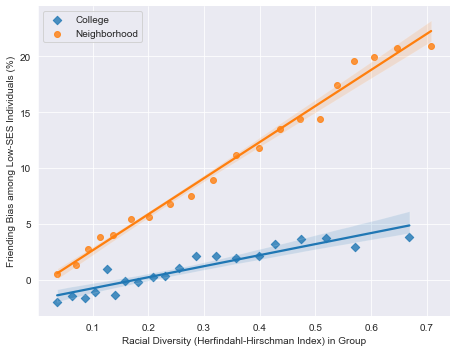

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt

  
# loading dataset
data= q5_final



sns.set_style('darkgrid') 

plot = sns.lmplot(x = "hhi",
            y = "bias",
            hue= 'type',
            data = data,
            fit_reg = True,
            aspect=1.3,
            markers=['D', 'o']) #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html

plot.set(xlabel='Racial Diversity (Herfindahl-Hirschman Index) in Group', ylabel='Friending Bias among Low-SES Individuals (%)')
          
plt.legend(loc='upper left')
plot.legend.remove()

# show the plot
plt.show()

# 

## Citing the data

* Chetty, Raj, Matthew O. Jackson, Theresa Kuchler, Johannes Stroebel, Nathaniel Hendren,
  Robert Fluegge, Sara Gong, Federico Gonzalez, Armelle Grondin, Matthew Jacob, Drew
  Johnston, Martin Koenen, Eduardo Laguna-Muggenberg, Florian Mudekereza, Tom Rutter,
  Nicolaj Thor, Wilbur Townsend, Ruby Zhang, Mike Bailey, Pablo Barber´a, Monica Bhole,
  and Nils Wernerfelt (2022a). “Social Capital I: Measurement and Associations with Economic
  Mobility.” Nature, 608(7921), 108−121.

* Chetty, Raj, Matthew O. Jackson, Theresa Kuchler, Johannes Stroebel, Nathaniel Hendren,
  Robert Fluegge, Sara Gong, Federico Gonzalez, Armelle Grondin, Matthew Jacob, Drew
  Johnston, Martin Koenen, Eduardo Laguna-Muggenberg, Florian Mudekereza, Tom Rutter,
  Nicolaj Thor, Wilbur Townsend, Ruby Zhang, Mike Bailey, Pablo Barber´a, Monica Bhole,
  and Nils Wernerfelt (2022b). “Social Capital II: Determinants of Economic Connectedness.”
  Nature, 608(7921), 122−134.